In [86]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  , ConfusionMatrixDisplay , classification_report , f1_score , precision_score , recall_score , confusion_matrix
import seaborn as sns
from skimage.feature import hog
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from skimage import io

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron , LogisticRegression
import pickle
import random

from prettytable import PrettyTable
from tabulate import tabulate



In [2]:
categories = ['jogging' , 
              'sitting' , 
              'standing' , 
              'walking']

data_directory = '/mnt/d/CV_project_phase_1/Dataset_images/'

In [4]:
image_size = (256, 256)
dataset = []
labels = []

for category in categories:
    folder_path = os.path.join(data_directory, category)
    for filename in os.listdir(folder_path):
        image_path = os.path.join(folder_path, filename)
        image = load_img(image_path, target_size=image_size)
        image_array = img_to_array(image)
        dataset.append(image_array)
        labels.append(categories.index(category))

dataset = np.array(dataset)
dataset = dataset.astype(np.uint8)
labels = np.array(labels)

In [11]:
hog_features = []
hog_labels = []

for image, label in zip(dataset, labels):
    
    image = cv2.cvtColor(image , cv2.COLOR_RGB2GRAY)

    # Apply HOG feature extraction
    features = hog(image, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=False,)

    # Append the features and label to the respective lists
    hog_features.append(features)
    hog_labels.append(label)

# Convert the feature and label lists to numpy arrays
hog_features = np.array(hog_features)
hog_labels = np.array(hog_labels)


In [12]:
hog_features.shape

(2584, 34596)

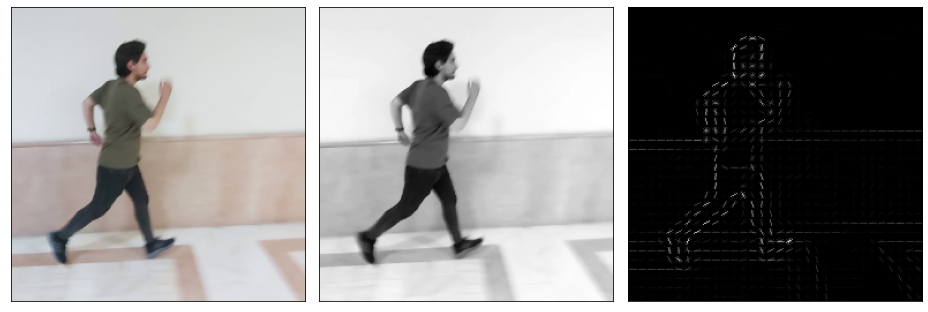

In [43]:
### sample visualization of HOG features

sample = dataset[91]


sample_gray = cv2.cvtColor(sample, cv2.COLOR_RGB2GRAY)

features, hog_image = hog(sample_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                          visualize=True)



images = [sample , sample_gray , hog_image]

plt.figure(figsize=(13,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    if images[i].shape == (256,256,3) : 
        plt.imshow(images[i])
    else : 
         plt.imshow(images[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

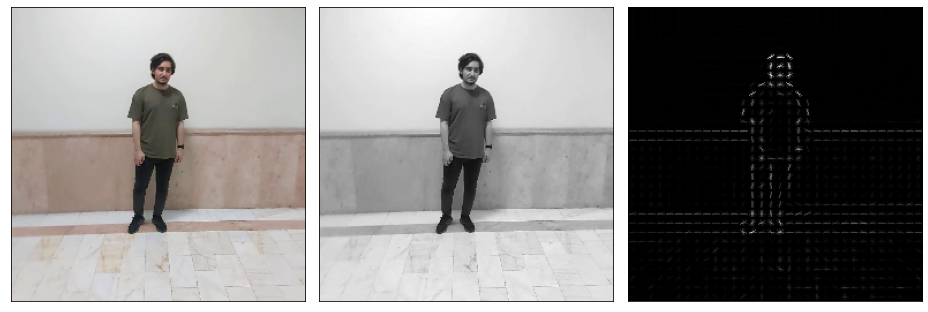

In [47]:

sample = dataset[1505]


sample_gray = cv2.cvtColor(sample, cv2.COLOR_RGB2GRAY)

features, hog_image = hog(sample_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                          visualize=True)



images = [sample , sample_gray , hog_image]

plt.figure(figsize=(13,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    if images[i].shape == (256,256,3) : 
        plt.imshow(images[i])
    else : 
         plt.imshow(images[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

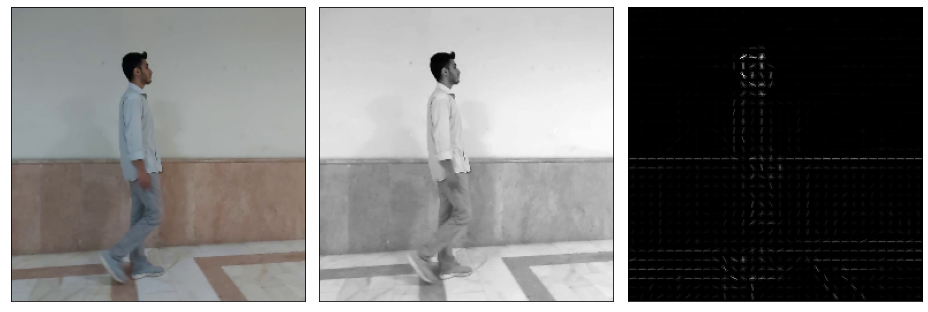

In [50]:

sample = dataset[2550]


sample_gray = cv2.cvtColor(sample, cv2.COLOR_RGB2GRAY)

features, hog_image = hog(sample_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                          visualize=True)



images = [sample , sample_gray , hog_image]

plt.figure(figsize=(13,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    if images[i].shape == (256,256,3) : 
        plt.imshow(images[i])
    else : 
         plt.imshow(images[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

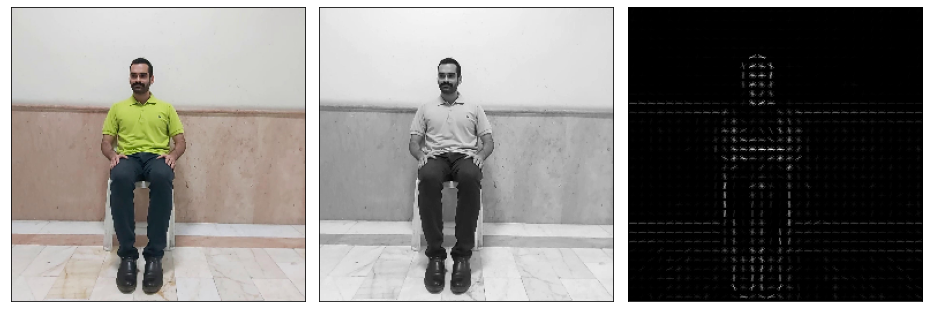

In [56]:

sample = dataset[850]


sample_gray = cv2.cvtColor(sample, cv2.COLOR_RGB2GRAY)

features, hog_image = hog(sample_gray, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                          visualize=True)



images = [sample , sample_gray , hog_image]

plt.figure(figsize=(13,7))
for i in range(3):
    plt.subplot(1,3,i+1)
    if images[i].shape == (256,256,3) : 
        plt.imshow(images[i])
    else : 
         plt.imshow(images[i],cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [72]:
## KNN with standard scaling

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(hog_features, hog_labels, test_size=0.2, random_state=42)


k = 10  
knn = KNeighborsClassifier(n_neighbors=k)

## Scaling the data
scaler = StandardScaler()
X_train_1 = scaler.fit_transform(X_train_1)
X_test_1 = scaler.transform(X_test_1)
knn.fit(X_train_1, y_train_1)

# Predict on the test set
y_pred = knn.predict(X_test_1)

report = classification_report(y_test_1, y_pred)

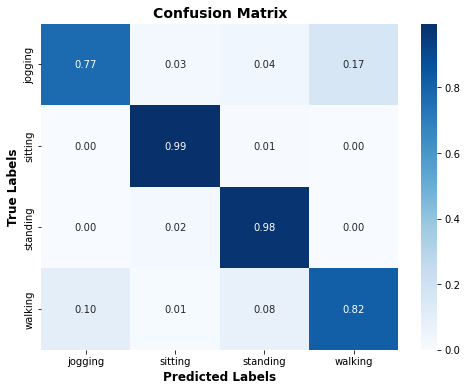

In [73]:
class_names = ['jogging' , 
              'sitting' , 
              'standing' , 
              'walking']
# Create confusion matrix
cm = confusion_matrix(y_test_1, y_pred)

# Normalize the confusion matrix
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Create a figure and axes
fig, ax = plt.subplots(figsize=(8, 6))

# Customize the heatmap colors
cmap = 'Blues'  # Change the color palette here

# Plot the heatmap
sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap=cmap, xticklabels=class_names, yticklabels=class_names, ax=ax)

# Customize labels and title
ax.set_xlabel('Predicted Labels', fontsize=12, fontweight='bold')
ax.set_ylabel('True Labels', fontsize=12, fontweight='bold')
ax.set_title('Confusion Matrix', fontsize=14, fontweight='bold')

plt.show()


In [76]:

report = classification_report(y_test_1, y_pred, target_names=class_names, output_dict=True)

# Create a pretty table
table = PrettyTable()
table.field_names = ['Class', 'Precision', 'Recall', 'F1-Score', 'Support']

# Add rows to the table
for class_name, scores in report.items():
    if class_name in class_names:
        precision = scores['precision']
        recall = scores['recall']
        f1_score = scores['f1-score']
        support = scores['support']
        table.add_row([class_name, precision, recall, f1_score, support])

# Set alignment and format for numeric columns
table.align['Class'] = 'l'
table.align['Precision'] = 'f'
table.align['Recall'] = 'f'
table.align['F1-Score'] = 'f'
table.align['Support'] = 'c'

# Print the styled classification report
print(table)

+----------+--------------------+--------------------+--------------------+---------+
| Class    |     Precision      |       Recall       |      F1-Score      | Support |
+----------+--------------------+--------------------+--------------------+---------+
| jogging  | 0.9072164948453608 | 0.7719298245614035 | 0.8341232227488151 |   114   |
| sitting  | 0.9633507853403142 | 0.9945945945945946 | 0.9787234042553191 |   185   |
| standing | 0.9111111111111111 | 0.9761904761904762 | 0.9425287356321839 |   126   |
| walking  | 0.7978723404255319 | 0.8152173913043478 | 0.8064516129032258 |    92   |
+----------+--------------------+--------------------+--------------------+---------+


In [77]:
# Save the model to a file
filename = 'knn_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(knn, file)